<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Data Analysis and Visualization</div>

# Principal Component Analysis and multivariate statistics

The field of statistics that handles situations in which we have more than two variables to compare to one another is called **multivariate** statistics. We have already done the most basic multivariate analysis in the form of a two-way ANOVA, which includes one dependent variable and two independent variables. Extensions of this approach to  incude MANOVA (multivariate ANOVA) and multiple regression. 

So far, however, we have only looked at data in which we have no more that one 'response' or dependent variable at a time. But of course in the real world we will be often looking at situations in which the measurement of multiple dependent variables will be relevant to the same scientific question. 

In this notebook we will look at the **Principal Component Analysis**, or **PCA**. PCA is fundamentally an *exploratory* type of analysis. We use it to discover the underlying structure of variation in a dataset and then to reduce that variation down to something more manageable. All of the varaibles in a PCA are independent of one another, the goal is not to test the effect of an experimental treatment. 

ADD EXAMPLES - various medical outcomes measures, or beta diversity trends from bioinfo class - ask MOLLY

## Getting Started - constructing a covariance matrix

Take a look at the data below. We have created a situation in which we expect 25 observations of variables a, b, and c are all correlated with one another. 

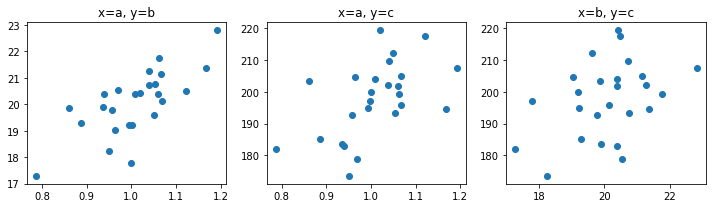

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a = np.random.normal(1, 0.1, 25)               # The parameters represent mean, SD, and number of samples
b = 10*a + np.random.normal(10, 1, 25)         ## I have made these distributions with different means
c = 100*a + np.random.normal(100, 10, 25)      ## but proportional SDs on purpose

fig, axes = plt.subplots(ncols=3, figsize=(10, 3))

ax1 = plt.subplot(1,3,1)
plt.scatter(a,b)
plt.title('x=a, y=b')

ax1 = plt.subplot(1,3,2)
plt.scatter(a,c)
plt.title('x=a, y=c')

ax1 = plt.subplot(1,3,3)
plt.scatter(b,c)
plt.title('x=b, y=c')

fig.tight_layout()


We can see that a, b, and c are all related to one another (we actually know why because we just manufactured this data, but in real life we wouldn't know the underlying relationship). We could run a regression line through each of these pairs of data points very easily! But that wouldn't tell us everything that we want to know, especially in a situation in which the relationship among the varialbes was more complicated, or if we had a larger number of variables to consider. 

An equivalent way to view this data is to consider the **covariance matrix** and the **correlation matrix** between these three variables using numpy.

In [15]:
cov_matrix = np.cov([a,b,c])
cor_matrix = np.corrcoef([a,b,c])

print('The covariance matrix of a, b, and c:\n',cov_matrix)
print()
print('The correlation matrix of a, b, and c:\n',cor_matrix)

The covariance matrix of a, b, and c:
 [[8.14277836e-03 8.04826995e-02 5.69776485e-01]
 [8.04826995e-02 1.51707153e+00 5.75020620e+00]
 [5.69776485e-01 5.75020620e+00 1.41320890e+02]]

The correlation matrix of a, b, and c:
 [[1.         0.72412443 0.53114737]
 [0.72412443 1.         0.39271474]
 [0.53114737 0.39271474 1.        ]]


### Question 1. 
Why are these matrices different from one another? **Hint**, the first section of <a href = 'https://en.wikipedia.org/wiki/Covariance_and_correlation'>this Wikipedia article</a> may be a helpful reminder. 

- 
- 
- 



## Review activity
A heatmap is a great way to visualize the covariance and correlation matrices for easy reading, make heatmaps that display those matrices side-by-side. 

Text(0.5, 1.0, 'Correlation Matrix')

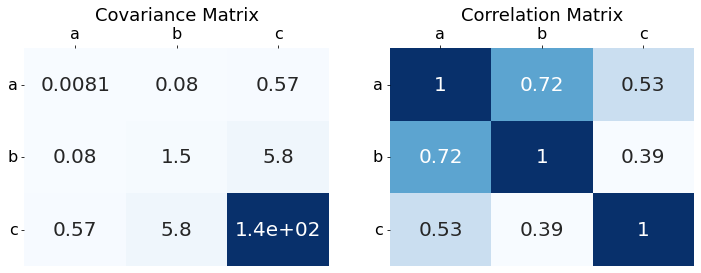

In [16]:
###    Your code for the heatmap here
####
####
import seaborn as sns

fighm = plt.subplots(figsize=(12, 4))

ax1 = plt.subplot(1,2,1)

ax1 = sns.heatmap(cov_matrix, annot = True, annot_kws={"size":20}, cmap = 'Blues', cbar = False)
ax1.set_xticks(ticks = [0.5,1.5,2.5],labels = ['a','b','c'], size = 16)
ax1.set_yticks(ticks = [0.5,1.5,2.5],labels = ['a','b','c'], rotation = 0, size = 16)
ax1.xaxis.tick_top()
plt.title('Covariance Matrix', size = 18)

ax2 = plt.subplot(1,2,2)

ax2 = sns.heatmap(cor_matrix, annot = True, annot_kws={"size":20}, cmap = 'Blues', cbar = False)
ax2.set_xticks(ticks = [0.5,1.5,2.5],labels = ['a','b','c'], size = 16)
ax2.set_yticks(ticks = [0.5,1.5,2.5],labels = ['a','b','c'], rotation = 0, size = 16)
ax2.xaxis.tick_top()
plt.title('Correlation Matrix', size = 18)




## What does PCA do?
What PCA does, in a nutshell, is to apply an ordinary least squares regression problem in higher-dimensional space. We can visualize this in our simple example, as it is a three-dimensional problem (although at higher dimensionalities it won't be possible to visualize it). 

First we have to convince ourselves that *just* as there is a line that represents the 'least squares' fit for a regression analysis there must *also* be a line that reduces the squared distance to the line for all points in a 3D representation of the dataset. Take a look at the figure below, although it's not the greatest representation is it obvious that there will be a single line that mimimizes the squared distance to all of the points in the dataset? Try to convince yourself of that. 

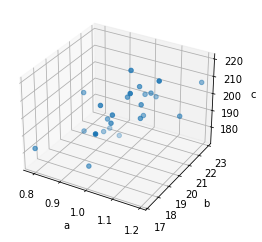

In [17]:
fig3D = plt.figure()
ax = fig3D.add_subplot(projection='3d')
ax.scatter(a,b,c, marker = 'o')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')
plt.show()

The line that has that property is the **First Principal Component** of this dataset.

Now let's think about what happens next. You can see that although that line will describe a lot of the variation among our highly correlated variables, we could also draw a line that is perpendicular to that line, and thus independent of or **orthogonal** to it. Once again there are an infinite number of lines that we could draw perpendicular to the first line in 3D space, so we want to pick the one that minimizes the squared difference of all of the points to that line. This line represents our **Second Principle Component**. 

In our example we can see that what we will have done is create a new set of perpendicular axes floating somewhere out there in our cloud of points. The **Third principal component** (in this example!) is therefore completely constrained. There is only a *single line* that is perpendicular to the first and second principle components. Because our data is three dimensional, this component will capture all the rest of the variance in the dataset.

### More than 3 dimensions

Once we get beyond three indepenedent variables in our data, we can no longer rely on a visual analogy as our visual systems aren't set up to process higher dimensions, but the underlying principles are exactly the same. If there are N variables in our data then our scatterplot would have to be presented in N-dimensional space, within that space there will be a mathematical structure that is equivalent to a line that minimizes the squared distance of all points to itself. That structure will possess an infinite set of structures that are orthogonal to it, and so on until the final principal component defines the complete set of new N-dimensional axes. Mathematically these structures are discovered via linear algebra, and are known as **eigenvectors** of the data. Python will handle all of that for us, however. 

Even when we are in higher-dimensional space, however, as the principle components are orthogonal to one another by definition, the output of a PCA will give us our principle components as values that can be plotted in two dimensional space as we will see below


## Running a PCA

We will use `statsmodels` for our PCA analysis, another major library, `scikitlearn` can also be employed. 

Let's first look at the <a href ='https://www.statsmodels.org/dev/generated/statsmodels.multivariate.pca.PCA.html'>documentation for the PCA function</a>. 

There are a lot of parameters here. Let's take a look at the set of three that are set to TRUE by default and that  include standardize, demean, and normalize. Go back and look at your answer to the question about the difference between the covariance and correlation matrices. Correlation, it turns out, is independent of the magnitude of the variables used - it is unitless. Covariance, however, is not. From the perspective of a PCA, having a large magnitude variable (like our variable c) will cause most of the covariance to be associated with variable c, and the choice of the first principle component will be unduly influenced by those aspects of the covariance matrix that include c as an element. 

Collectively these values reset our means to zero so that we can see the relative influence of each factor. Practically speaking this means that we are working with the correlation and not the covariance matrix of the variables. 

Another important variable is ncomp, which tells the PCA how many principle components it should calculate. 

Running the model is very easy. 


In [18]:
from statsmodels.multivariate.pca import PCA

abc_data = pd.DataFrame({'a':a,'b':b,'c':c})  # if we just feed in lists a, b, and c it will flip vars and obs

abc_PCA = PCA(abc_data)

print(abc_PCA)


Principal Component Analysis(nobs: 25, nvar: 3, transformation: Standardize (Correlation), normalization: True, number of components: 3, SVD)


So it looks like our PCA ran ok, but it doesn't have a default display object, so we will have to go in and pull out the data we need to work with to think about interpreting it. I think the following three elements are the most useful:

In [20]:
print('PCA loadings\nvalues can be intepreted as correlations between variables and components')
print(abc_PCA.loadings)
print()
print('Cumulative R^2 value (cumulative variation\nexplained as each component is added)')
print(abc_PCA.rsquare)
print()
print('Coefficients for the projection onto PCA axes (see below)')
print(abc_PCA.coeff)

PCA loadings
values can be intepreted as correlations between variables and components
     comp_0    comp_1    comp_2
a -0.627672  0.193144  0.754137
b -0.589284  0.515136 -0.622397
c -0.508696 -0.835063 -0.209520

Cumulative R^2 value (cumulative variation
explained as each component is added)
ncomp
0    0.000000
1    0.703435
2    0.915065
3    1.000000
Name: rsquare, dtype: float64

Coefficients for the projection onto PCA axes (see below)
               a         b         c
comp_0 -4.559063 -4.280234 -3.694883
comp_1  0.769486  2.052303 -3.326891
comp_2  1.903375 -1.570876 -0.528810


A much better approach is to use some of the built in methods to describe the data:

<Figure size 432x288 with 0 Axes>

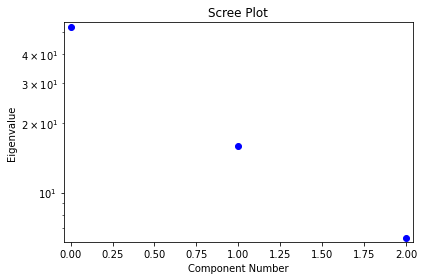

In [21]:
fig1 = plt.figure()
ax = abc_PCA.plot_scree()

<Figure size 432x288 with 0 Axes>

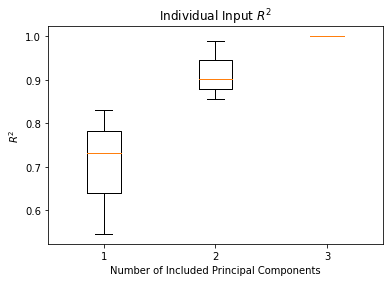

In [22]:
fig1 = plt.figure()
ax = abc_PCA.plot_rsquare()

These figures correspond to the first two data outputs above. The size of the eigenvalue for a particular vector is a measure of how much of the variation it explains. The classic output of a PCA is the graph below:

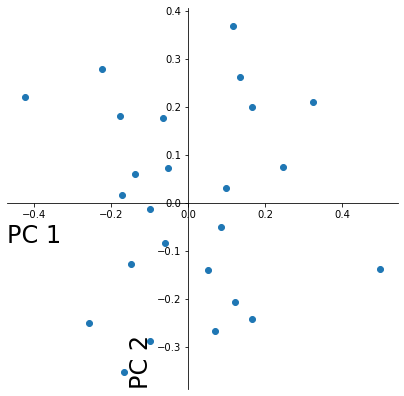

In [23]:
fig3, ax = plt.subplots(figsize=(7,7))

ax.scatter(abc_PCA.factors['comp_0'],abc_PCA.factors['comp_1'])
ax.set_xlabel('PC 1', size =24, loc = 'left')
ax.set_ylabel('PC 2', size = 24, loc = 'bottom')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')


This is the 'projection' of our original data down onto the first two PCA axes. Looking back at the tables above we would interpret this this way:

- This projection captures 93% (rsquare = 0.9405) of the data in our orginal dataset. 
- We need to look at the PCA loadings to see what each axis means. The loadings show that a, b, and c are all contributing similarly to the first axis. Since we know that all three variables are intercorrelated, we can thing of PC1 as capturing that positive correlation. Around 80% (rsquare = 0.7979)of the variation in the data is explained by this first PC. 
- Principal component 2 explains much less of the data, corrsponds to a strong positive loading of variable c, and a weaker negative loading on variable b. We can think of this principle component as representing a much weaker (as it only accounts for 13% of the variation in the data) inverse relation between b and c. 

Sometimes this projection will reveal important patterns in the data. For example, if data were strongly clustered along the PCA, we might interpret the result as meaning there were distinct groupings of observations present in the data. As we were using randomly generated data, here ... not so much.  

### Question 

Write your conclusions. What values did you use to come to those conclusions?

- 
- 
- 

Go back and generate a new random data set and rerun the analyses.

- 
- 
- 

Which variables stayed the same and which ones changed when the data changed?

- 
- 
- 

What does this tell you about how we should interpret Principle components that don't explain much of the variation? Take into considertation that that we know the 'right answer' regarding the relationships among a, b, and c based on how the data was actually generated?

- 
- 
- 


## Application Exercise

Now let's look at a *much* more interesting dataset. `Liko_Na_Pilina.csv`, located in your `data` folder, contains a data set of plan species traits collected by Rebecca Ostertag, an ecologist working in Hawaii, and her colleagues. A description of the variables included in this dataset and the rationale behind why this data was collected can be found in <a href = 'https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/1365-2664.12413'> this short article</a>.

For this dataset I would like you to generate

- heatmaps for the covariance and correlation matrices between the traits
- a report of important values generated by the PCA
- the scree plot and box plots for analyzing the PCA
- a projection plot showing the first two principal components
- in the text cell below, include an interpretation of what each of the principal components means, as well as an overall interpretation of your results

In [24]:
### Your code goes here 
### (you may want to make multiple code windows to output different graphs and tables)

In [25]:
liko = pd.read_csv('data/Liko_Na_Pilina.csv', index_col = 'Species code')

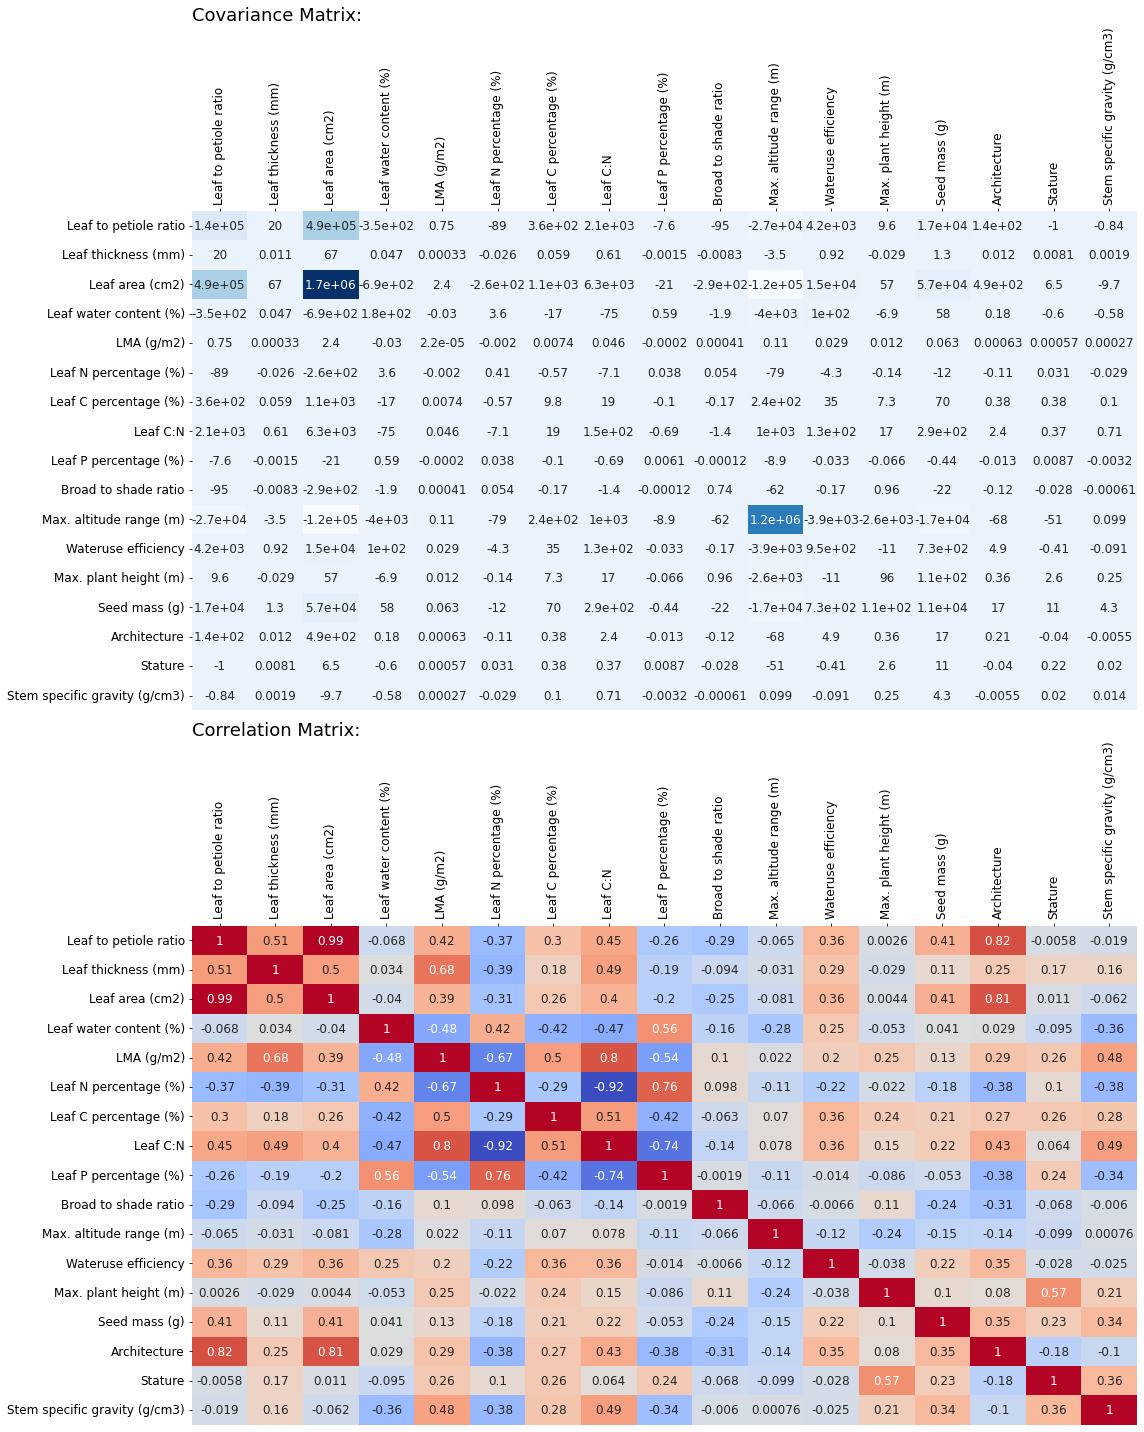

In [26]:
def PCA_heatmaps(df):
    cov_matrix = np.cov(df, rowvar = False)
    cor_matrix = np.corrcoef(df, rowvar = False)
    
    tickpos = np.linspace(0.5,len(df.columns)-0.5,len(df.columns))
    xtickpos = np.linspace(0, len(df.columns)-1, len(df.columns))
    ticknames = list(df.columns)
    
    fighm = plt.subplots(figsize=(16, 20))

    ax = plt.subplot(2,1,1)

    ax = sns.heatmap(cov_matrix, annot = True, annot_kws={"size":12}, cmap = 'Blues', cbar = False)
    ax.set_xticks(ticks = tickpos, labels = ticknames, rotation = 90,size = 12)
    ax.set_yticks(ticks = tickpos, labels = ticknames, rotation = 0, size = 12)
    ax.xaxis.tick_top()
    plt.title('Covariance Matrix:', size = 18, loc = 'left')

    ax = plt.subplot(2,1,2)
    ax = sns.heatmap(cor_matrix, annot = True, annot_kws={"size":12}, cmap = 'coolwarm', cbar = False)
    ax.set_xticks(ticks = tickpos, labels = ticknames, rotation = 90,size = 12)
    ax.set_yticks(ticks = tickpos, labels = ticknames, rotation = 0, size = 12)
    ax.xaxis.tick_top()

    plt.title('Correlation Matrix:', size = 18, loc = 'left')
    
    plt.tight_layout()

PCA_heatmaps(liko)

In [27]:
from statsmodels.multivariate.pca import PCA

liko_PCA = PCA(liko)

print(liko_PCA)

Principal Component Analysis(nobs: 29, nvar: 17, transformation: Standardize (Correlation), normalization: True, number of components: 17, SVD)


In [28]:
liko_PCA.loadings



,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,comp_10,comp_11,comp_12,comp_13,comp_14,comp_15,comp_16
Leaf to petiole ratio,0.314795,0.347611,0.008440,-0.061388,0.029944,0.235836,-0.104285,-0.177551,0.013546,-0.099829,0.165649,-0.149411,-0.114864,0.326145,-0.090263,-0.013312,0.699653
Leaf thickness (mm),0.255219,0.096339,-0.058506,0.357902,-0.510651,0.062352,-0.289745,0.019961,0.118025,0.352917,-0.158867,-0.143474,-0.204598,-0.147061,0.440914,0.049636,-0.020036
Leaf area (cm2),0.297931,0.367573,-0.008174,-0.035381,0.034560,0.259805,-0.113693,-0.216866,-0.011704,-0.132039,0.145228,-0.161683,-0.106486,0.197444,-0.191856,-0.016405,-0.702819
Leaf water content (%),-0.176127,0.393085,-0.150331,0.189602,-0.145805,-0.313900,-0.012889,0.277780,-0.270169,0.405557,0.124158,-0.114225,0.368943,0.262540,-0.278119,-0.102053,-0.007311
LMA (g/m2),0.350969,-0.196039,-0.069547,0.250939,-0.150558,0.105082,-0.148956,-0.036431,0.057461,0.086468,-0.011720,0.544207,0.099104,-0.168320,-0.591950,0.122197,0.052825
Leaf N percentage (%),-0.336821,0.155008,-0.216495,-0.022738,0.008007,0.264980,0.112999,-0.162220,0.229430,0.277627,0.278357,0.033692,-0.247772,-0.387458,-0.152729,-0.510179,0.048154
Leaf C percentage (%),0.254176,-0.123178,-0.132505,-0.033304,0.111318,0.228164,0.581368,0.095350,0.421301,0.381340,-0.053675,0.025579,0.200236,0.317911,0.124212,0.059119,-0.059055
Leaf C:N,0.386402,-0.156093,0.081451,0.044953,-0.045143,-0.175063,0.020692,0.182153,-0.082794,-0.204150,-0.053028,0.106002,0.045339,0.126708,0.116795,-0.810122,-0.027392
Leaf P percentage (%),-0.289640,0.231208,-0.280174,0.054483,-0.297822,0.110061,0.066133,-0.130286,-0.003458,-0.310884,0.049845,0.596134,0.092844,0.297401,0.325846,0.010633,-0.033892
Broad to shade ratio,-0.079374,-0.225890,0.006895,0.578390,0.258219,0.097297,0.064160,-0.590276,-0.278524,0.060776,-0.000765,-0.126795,0.236018,0.073746,0.110533,-0.091385,0.018589


In [29]:
liko.head()


,Leaf to petiole ratio,Leaf thickness (mm),Leaf area (cm2),Leaf water content (%),LMA (g/m2),Leaf N percentage (%),Leaf C percentage (%),Leaf C:N,Leaf P percentage (%),Broad to shade ratio,Max. altitude range (m),Wateruse efficiency,Max. plant height (m),Seed mass (g),Architecture,Stature,Stem specific gravity (g/cm3)
Species code,,,,,,,,,,,,,,,,,
ALMO,2.05,0.22,98.70,48.22,0.009,1.95,43.08,22.88,0.18,2.00,1200,60.37,20.0,8.99,2.00,2.9,0.31
ANPL,19.91,0.33,55.28,49.51,0.012,1.32,39.26,30.27,0.08,1.00,914,54.84,12.0,0.04,2.00,2.0,0.42
ARAL,10.39,0.34,781.49,57.64,0.011,2.34,38.95,16.99,0.19,3.00,1551,97.66,15.5,5.89,1.97,2.8,0.29
BRPA,2.63,0.46,176.83,67.69,0.007,2.54,37.52,14.89,0.30,0.66,1500,61.72,12.0,0.00,1.18,3.0,0.40
CAIN,9.19,0.39,88.88,54.03,0.017,1.08,46.34,43.12,0.09,2.00,800,115.45,20.0,6.66,1.90,3.0,0.44


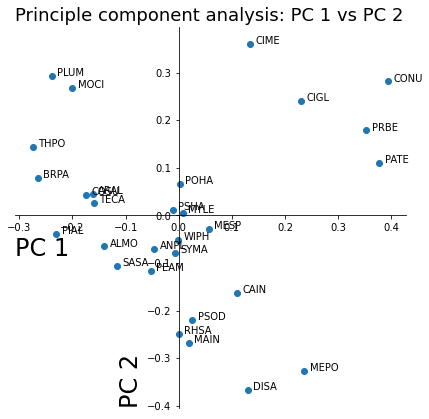

()

In [30]:
def PCAfig(pca, annotate_points = True, title = True, comp1 = 1, comp2 = 2):

    fig3, ax = plt.subplots(figsize=(7,7))

    ax.scatter(pca.factors.iloc[:,comp1 - 1], pca.factors.iloc[:,comp2 - 1], )
    ax.set_xlabel('PC ' + str(comp1), size =24, loc = 'left')
    ax.set_ylabel('PC ' + str(comp2), size = 24, loc = 'bottom')

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')

    if annotate_points == True:
        for i in liko_PCA.factors.index:
            plt.text(pca.factors.loc[i,'comp_00']+0.01,pca.factors.loc[i,'comp_01'], i)
    
    if title == True:
        plt.title('Principle component analysis: PC %i vs PC %i '%(comp1, comp2), size = 18, loc = 'left')
    
    plt.show()
    
    return()
            
PCAfig(liko_PCA)          

In [31]:
liko_PCA.factors.index
liko_PCA.factors.loc['ALMO','comp_00']

-0.1402366129426208

In [32]:
comp1=1
liko_PCA.factors.iloc[:,comp1 - 1]


Species code
ALMO   -0.140237
ANPL   -0.046022
ARAL   -0.161763
BRPA   -0.265626
CAIN    0.109231
CIGL    0.230153
CIME    0.133994
CONU    0.394069
COSU   -0.173855
DISA    0.130605
MAIN    0.018961
MEPO    0.236826
MESP    0.056145
MOCI   -0.200203
MYLE    0.007612
PATE    0.378073
PEAM   -0.052389
PIAL   -0.230297
PLUM   -0.239193
POHA    0.002640
PRBE    0.353651
PSHA   -0.010943
PSOD    0.025853
RHSA    0.000799
SASA   -0.116411
SYMA   -0.006286
TECA   -0.159737
THPO   -0.274623
WIPH   -0.001027
Name: comp_00, dtype: float64

## Your interpretations of the PCA go here

- 
- 
- 


ncomp
0     0.000000
1     0.322584
2     0.482489
3     0.599580
4     0.672511
5     0.737127
6     0.796792
7     0.853257
8     0.898438
9     0.931730
10    0.952225
11    0.970785
12    0.980206
13    0.988961
14    0.995574
15    0.998417
16    0.999868
17    1.000000
Name: rsquare, dtype: float64


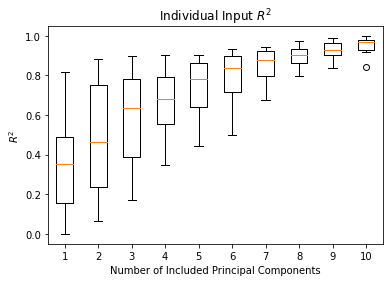

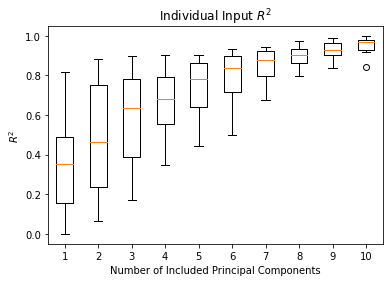

In [37]:
print(liko_PCA.rsquare)
liko_PCA.plot_rsquare()


![TJU logo image](images/TJU_logo_image.png "TJU logo image")